In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'darkgrid')

# Dataset Analysis

In [3]:
tauraat = pd.read_csv('./tauraat-2022-10-24.csv', converters={'site_no': str}, low_memory=False)

## Remove Zero/ Missing Values

In [8]:
tau_no_zero = tauraat[(tauraat['discharge_va'] != 0) & (tauraat['gage_height_va'] != 0) & (tauraat['chan_width'] != 0)]
tau_no_nan = tau_no_zero.dropna(axis=0, subset=['discharge_va', 'gage_height_va', 'chan_width'])
print(f"dataset size: {tau_no_nan.shape}")

dataset size: (2312896, 37)


## TAURAAT Sites with more than 50 Observations

In [33]:
tau_site_obs = tau_no_nan['site_no'].value_counts()
tau_stat = tau_no_nan[tau_no_nan["site_no"].isin(tau_site_obs.index[tau_site_obs>=50].to_list())]

print("site locations with minimum of 50 observations: ")
print(f'Number of observations: {tau_stat.shape}')
print('Number of sites:')
tau_stat['site_no'].value_counts().describe()

site locations with minimum of 50 observations: 
Number of observations: (2279530, 37)
Number of sites:


count    7446.000000
mean      306.141553
std       263.099866
min        50.000000
25%       144.000000
50%       247.000000
75%       374.000000
max      6579.000000
Name: site_no, dtype: float64

### Positive Discharge

In [11]:
tau_pos_dis = pd.DataFrame()
for site, group in tau_stat.groupby("site_no"):
   if (group["discharge_va"].values > 0).all():
        tau_pos_dis = pd.concat([tau_pos_dis, group], ignore_index=True)

print("site locations with positive discharge: ")
tau_pos_dis['site_no'].value_counts().describe()

site locations with positive discharge: 


count    7098.000000
mean      309.828543
std       266.145184
min        50.000000
25%       147.000000
50%       251.000000
75%       377.000000
max      6579.000000
Name: site_no, dtype: float64

In [41]:
tau_pos_dis.to_csv('./data/tau_pos_dis.csv', sep=',', encoding='utf-8', index=False)

In [12]:
tau_pos_freq = tau_pos_dis['site_no'].value_counts()
print(tau_pos_freq)

06807000    6579
06486000    5471
06610000    5455
06813500    3694
07022000    3103
            ... 
11358020      50
03036240      50
01021452      50
05316570      50
11407000      50
Name: site_no, Length: 7098, dtype: int64


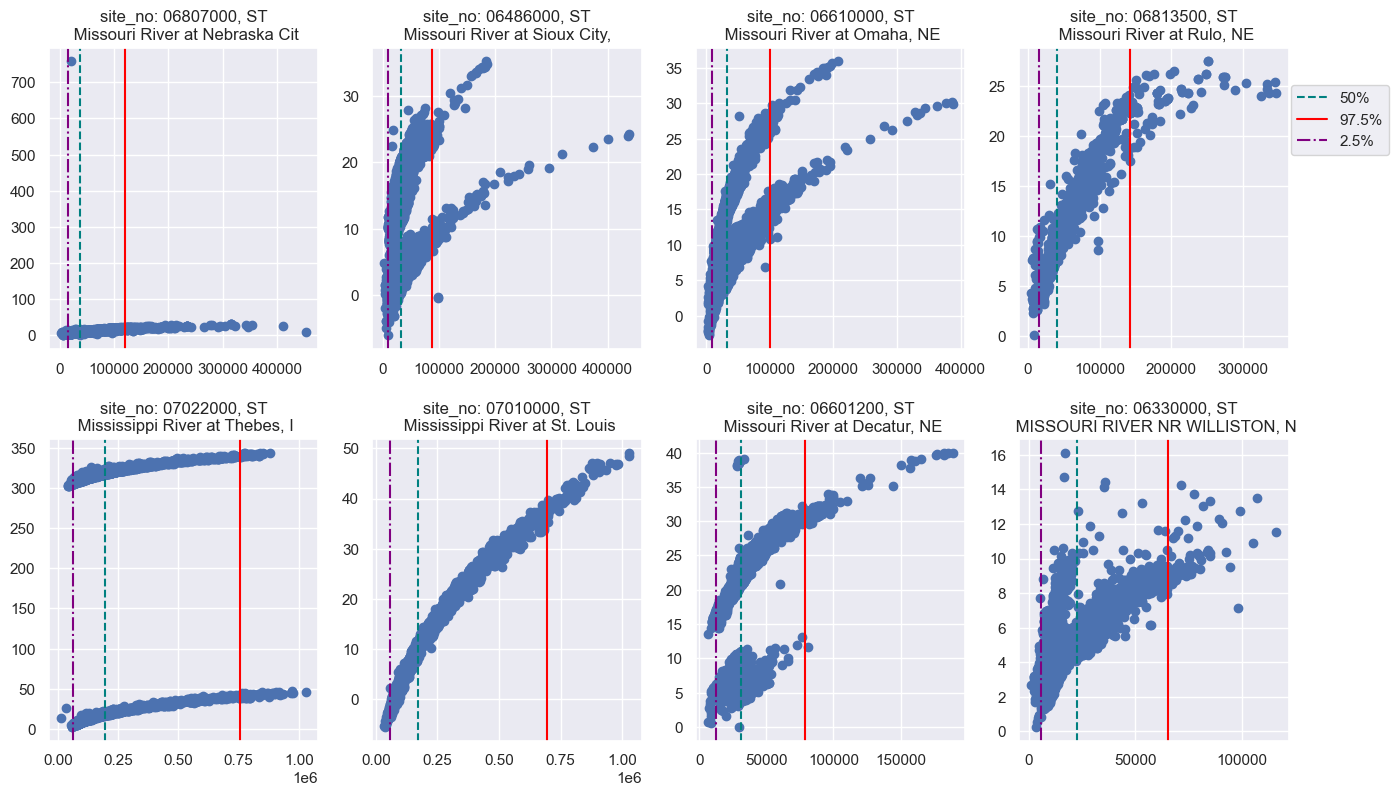

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=4 , figsize=(16, 9), constrained_layout=False)

for idx, site_obs in enumerate(tau_pos_freq[:8]):
    usgs_cd = tau_pos_freq.index[tau_pos_freq == site_obs].values[0]
    usgs_nm = tau_pos_dis[tau_pos_dis['site_no'] == usgs_cd].iloc[0]['station_nm']
    usgs_tp = tau_pos_dis[tau_pos_dis['site_no'] == usgs_cd].iloc[0]['site_tp_cd']

    i, j = divmod(idx, 4)
    df_plt = tau_pos_dis[tau_pos_dis["site_no"] == usgs_cd]
    axes[i, j].scatter(df_plt["discharge_va"], df_plt["gage_height_va"])
    axes[i,j].axvline(x=df_plt["discharge_va"].median() , color='teal', linestyle='--', label='50%')
    axes[i,j].axvline(x=df_plt["discharge_va"].quantile((100-2.5)/100) , color='red', linestyle='-', label='97.5%')
    axes[i,j].axvline(x=df_plt["discharge_va"].quantile(2.5/100) , color='purple', linestyle='-.', label='2.5%')
    axes[i, j].set_title(f"site_no: {usgs_cd}, {usgs_tp}\n {usgs_nm[:30]}")

plt.legend(bbox_to_anchor=(1.4, 2.2))
plt.savefig('./data/tau_pos_dis.png')
plt.subplots_adjust(hspace=0.3) # (left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

### Negative Discharge

In [16]:
tau_neg_dis = pd.DataFrame()
for site, group in tau_stat.groupby("site_no"):
   if (group["discharge_va"].values < 0).any():
        tau_neg_dis = pd.concat([tau_neg_dis, group], ignore_index=True)

print("site locations with positive discharge: ")
tau_neg_dis['site_no'].value_counts().describe()

site locations with positive discharge: 


count     348.000000
mean      230.939655
std       174.664600
min        50.000000
25%       107.000000
50%       167.500000
75%       303.250000
max      1145.000000
Name: site_no, dtype: float64

In [17]:
tau_neg_freq = tau_neg_dis['site_no'].value_counts()
print(tau_neg_freq)

10351300     1145
05458500      903
05599500      822
12439500      809
11313405      799
             ... 
05536700       53
11452900       52
08162501       52
02047370       50
040851385      50
Name: site_no, Length: 348, dtype: int64


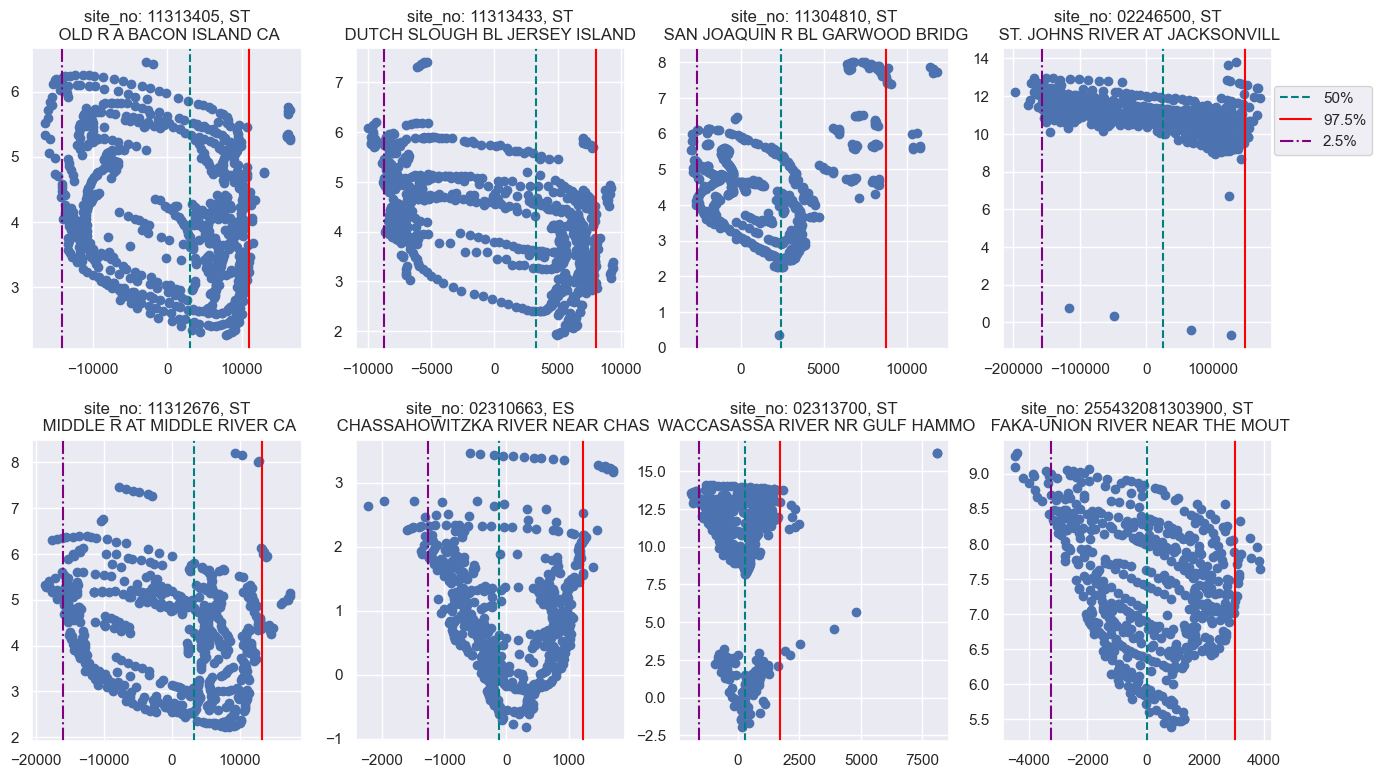

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=4 , figsize=(16, 9), constrained_layout=False)

v1 = [0,2,3,6,8,10,11,13]
v2 = [4,5,7,9,12,16,18,22]

for idx, site_obs in enumerate(tau_neg_freq.iloc[v2]):
    usgs_cd = tau_neg_freq.index[tau_neg_freq == site_obs].values[0]
    usgs_nm = tau_neg_dis[tau_neg_dis['site_no'] == usgs_cd].iloc[0]['station_nm']
    usgs_tp = tau_neg_dis[tau_neg_dis['site_no'] == usgs_cd].iloc[0]['site_tp_cd']

    i, j = divmod(idx, 4)
    df_plt = tau_neg_dis[tau_neg_dis["site_no"] == usgs_cd]
    axes[i, j].scatter(df_plt["discharge_va"], df_plt["gage_height_va"])
    axes[i,j].axvline(x=df_plt["discharge_va"].median() , color='teal', linestyle='--', label='50%')
    axes[i,j].axvline(x=df_plt["discharge_va"].quantile((100-2.5)/100) , color='red', linestyle='-', label='97.5%')
    axes[i,j].axvline(x=df_plt["discharge_va"].quantile(2.5/100) , color='purple', linestyle='-.', label='2.5%')
    axes[i, j].set_title(f"site_no: {usgs_cd}, {usgs_tp}\n {usgs_nm[:30]}")

plt.legend(bbox_to_anchor=(1.4, 2.2))
plt.savefig('./data/tau_neg_dis_v2.png')
plt.subplots_adjust(hspace=0.3) # (left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()